# 3.3 Activity: Analysis of Variance

Our **Unit 3** activities will use data from the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, on the fuel economy of 2023 vehicles.

To complete this activity, you will: 

1. Conduct exploratory data analysis based on features of interest.

2. Build a One-way ANOVA model using a selected predictor.

3. Check model assumptions, test for outliers, and perform posthoc comparisions.

4. Provide a summary statement on your model.

**Acknowledgements**

This information was provided by the U.S. Environmental Protection Agency,
Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory,
2000 Traverwood, Ann Arbor, MI 48105 (734-214-4200) and obtained from https://www.fueleconomy.gov.

## Data Dictionary

|variable | description |
|:---------------------|:-----------|
|Model Year|Year used to designate discrete vehicle model.|
|Division|Automobile manufacturer|
|Carline|Model name|
|Verify Mfr Cd|Manufacturer code|
|City|Estimated city mpg (miles/gallon)|
|Hwy|Estimated highway mpg (miles/gallon)|
|Combined|Estimated combined mpg (miles/gallon)|
|Eng Displ|Engine displacement in liters|
|# Cyl|Number of engine cylinders|
|Fuel Usage|Fuel type used|
|Guzzler?|High fuel consumption indicator|
|Air Aspir Method|Engine and Motor Descriptors|
|Trans|Transmission Descriptors|
|# Gears|Number of transmission gears|
|Lockup Torque Converter|Indicator if has a clutch|
|Trans Creeper Gear|Indicator if has a creeper gear|
|Drive Sys|Drive axel type|
|Intake Valves Per Cyl|Number of intake valves per engine cylinder|
|Exhaust Valves Per Cyl|Number of exhaust valves per engine cylinder|
|Carline Class|Vehicle size class|
|Release Date|Date of initial release|

*Note: Some columns have been dropped to simplify the dataset.*

**See also:**

- *https://www.fueleconomy.gov/feg/pdfs/guides/FEG2023.pdf*
- *https://www.fueleconomy.gov/feg/findacarhelp.shtml*


## Research Question

**Does the mean mpg differ significantly by fuel type used?**

## Part 1: Workspace Setup

**Tasks**

- Run the cell below to download the 2023 EPA Fuel Economy dataset.
- Import necessary libraries to perform exploratory data analysis and data wrangling.
- Import statsmodels to test and build anova models.
- Read in the data file to a variable called `cars`. 
- Return the first few rows of the resulting DataFrame to ensure it has loaded correctly.

In [1]:
# Download data (2023-Fuel_Economy.csv)
!gdown 1NXX4zYClHK7xgxI-Ir58UXcSmTi82GDw

Downloading...
From: https://drive.google.com/uc?id=1NXX4zYClHK7xgxI-Ir58UXcSmTi82GDw
To: /content/2023-Fuel_Economy.csv
100% 89.8k/89.8k [00:00<00:00, 47.7MB/s]


In [44]:
#packages for EDA/ data wrangling/ statsmodels
import pandas as pd
import statsmodels.api as smapi
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import matplotlib.pyplot as plt

In [5]:
#setting up cars
cars = pd.read_csv('/content/2023-Fuel_Economy.csv')
cars.head() #looks right

,Model Year,Division,Carline,Verify Mfr Cd,City,Hwy,Combined,Eng Displ,# Cyl,Fuel Usage,...,Air Aspir Method,Trans,# Gears,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Carline Class,Release Date
0,2023,Aston Martin Lagonda Ltd,V12 Vantage,ASX,14,22,16,5.2,12,GP,...,TC,A,8,Y,N,R,2,2,1,6/29/2022
1,2023,Aston Martin Lagonda Ltd,Vantage V8,ASX,18,24,20,4.0,8,GP,...,TC,A,8,Y,N,R,2,2,1,4/29/2022
2,2023,Audi,R8 Coupe quattro,VGA,13,18,15,5.2,10,GPR,...,NaN,AMS,7,N,N,A,2,2,1,7/29/2022
3,2023,Audi,R8 Coupe RWD,VGA,14,23,17,5.2,10,GPR,...,NaN,AMS,7,N,N,R,2,2,1,7/29/2022
4,2023,Audi,R8 GT RWD,VGA,14,21,17,5.2,10,GPR,...,NaN,AMS,7,N,N,R,2,2,1,10/21/2022


## Part 2: Exploratory Data Analysis & Data Wrangling

Since you have performed EDA and wrangling in the previous activity on this dataset already, you should have a pretty good understanding of the data's characteristics. Our variables of interest this time around will be `City`, `Hwy`, `Combined`, and `Fuel Usage`.

Create a new DataFrame called `fuel_economy` with just these features.

In [6]:
fuel_economy = cars[['City','Hwy','Combined','Fuel Usage']]

Display `value_counts` for each category in `Fuel Usage` (in any order).

**Categories:**

|||
|---|---|
|DU|Diesel, ultra low sulfur (15 ppm, max)|
|G|Gasoline (Regular Unleaded Recommended)|
|GM|Gasoline (Mid Grade Unleaded Recommended)|
|GP|Gasoline (Premium Unleaded Recommended)|
|GPR|Gasoline (Premium Unleaded Required)|

<Axes: >

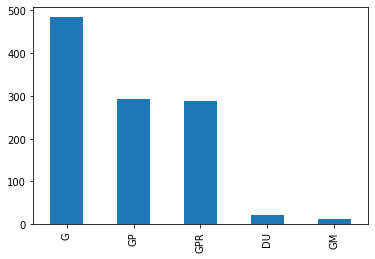

In [8]:
fuel_economy['Fuel Usage'].value_counts().plot.bar()
#In the below, we can see about 500 counts of "G", around 300 counts for "GP" and "GPR", and very little for "DU" and "GM"

Then, display the means for:

- `City` by `Fuel Usage`
- `Hwy` by `Fuel Usage`
- `Combined` by `Fuel Usage`

*Hint: Use Pandas to create groups by your categorical variable then subset the DataFrame.*

In [12]:
groupbyfuelusage = fuel_economy.groupby('Fuel Usage')

In [17]:
groupbyfuelusage['City'].mean()

Fuel Usage
DU     21.272727
G      23.479339
GM     15.384615
GP     19.465753
GPR    17.709343
Name: City, dtype: float64

DU          Axes(0.1,0.679412;0.363636x0.220588)
G      Axes(0.536364,0.679412;0.363636x0.220588)
GM          Axes(0.1,0.414706;0.363636x0.220588)
GP     Axes(0.536364,0.414706;0.363636x0.220588)
GPR             Axes(0.1,0.15;0.363636x0.220588)
dtype: object

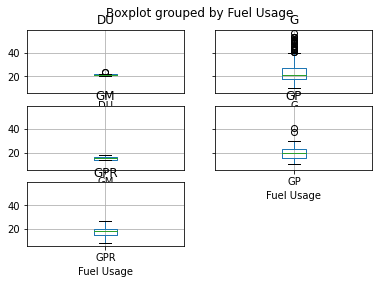

In [13]:
groupbyfuelusage.boxplot(by='Fuel Usage', column='City')

In [18]:
groupbyfuelusage['Hwy'].mean()

Fuel Usage
DU     26.818182
G      28.731405
GM     22.384615
GP     26.493151
GPR    24.204152
Name: Hwy, dtype: float64

DU          Axes(0.1,0.679412;0.363636x0.220588)
G      Axes(0.536364,0.679412;0.363636x0.220588)
GM          Axes(0.1,0.414706;0.363636x0.220588)
GP     Axes(0.536364,0.414706;0.363636x0.220588)
GPR             Axes(0.1,0.15;0.363636x0.220588)
dtype: object

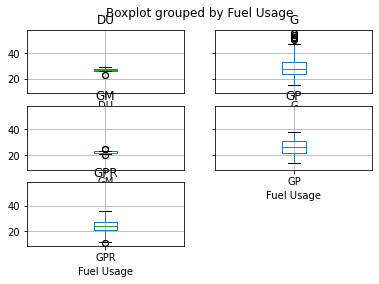

In [14]:
groupbyfuelusage.boxplot(by='Fuel Usage', column='Hwy')

In [19]:
groupbyfuelusage['Combined'].mean()

Fuel Usage
DU     23.363636
G      25.502066
GM     17.923077
GP     22.044521
GPR    20.131488
Name: Combined, dtype: float64

DU          Axes(0.1,0.679412;0.363636x0.220588)
G      Axes(0.536364,0.679412;0.363636x0.220588)
GM          Axes(0.1,0.414706;0.363636x0.220588)
GP     Axes(0.536364,0.414706;0.363636x0.220588)
GPR             Axes(0.1,0.15;0.363636x0.220588)
dtype: object

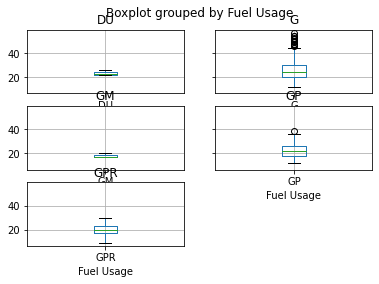

In [15]:
groupbyfuelusage.boxplot(by='Fuel Usage', column='Combined')

Create a bivariate plots for `City`, `Hwy`, and `Combined` using `Fuel Usage` to create groupings.

<Axes: title={'center': 'City'}, xlabel='Fuel Usage'>

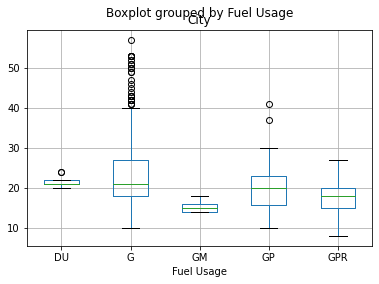

In [9]:
fuel_economy.boxplot(by='Fuel Usage', column='City')

<Axes: title={'center': 'Hwy'}, xlabel='Fuel Usage'>

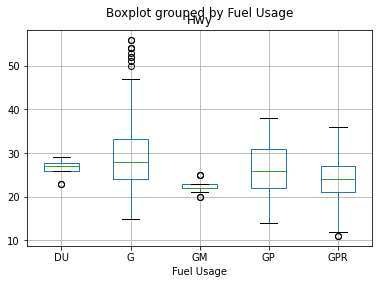

In [10]:
fuel_economy.boxplot(by='Fuel Usage', column='Hwy')

<Axes: title={'center': 'Combined'}, xlabel='Fuel Usage'>

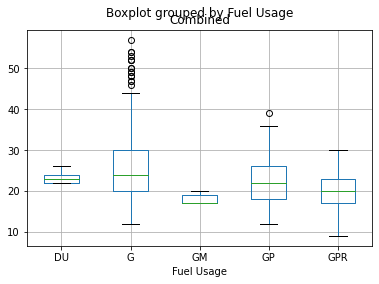

In [11]:
fuel_economy.boxplot(by='Fuel Usage', column='Combined')

**Describe the nature of the data**

*Based on your observations, what might you expect?*

As expected, we can see the the mean values for Hwy by Fuel Usage is the highest of the three, mean values for City by Fuel Usage is the lowest of the three, and the Combined values are in the middle. From the sets of plots above, we can see a lot of variation in values between each Fuel Usage category. For all City, Hwy, Combined values, we can see a lot more spread for the Fuel Usage values G and GP. GPR has a notable spread for all three types, but not quite as much as G and GP. And lastly, the smallest categories seem to have data points more closely together. One thing to note here is that DU and GM have the smallest value range of the 5 Fuel Usage Types, but they also have the least amount of observations compared to the full set (like we found in the bar plot) so this observation may prove to be a result of sampling.

## Part 3: Model Building

Using [Statsmodels](https://www.statsmodels.org), build an Ordinary Least Squares (OLS) regression model with `Fuel Usage` as your predictor then choose `City`, `Hwy`, or `Combined` as your response.

Use [smf](https://www.statsmodels.org/stable/example_formulas.html) to build your model; save this to a variable called `model`.
  
```
model = statsmodels.formula.api.ols(formula=...)
```

*To reference variables with spaces in their names in smf, you must wrap the column name in Q() for "quoted" values. Ex: Q("Fuel Usage").*

In [28]:
#I'm chosing to start with City as the response
model = smf.ols(formula='City ~ Q("Fuel Usage")', data=fuel_economy)

Run `fit()` on your `model` and display the model fit results with `summary()`.

In [29]:
Fit_model = model.fit()

In [34]:
Fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   City   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     47.08
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.50e-36
Time:                        03:38:28   Log-Likelihood:                -3557.7
No. Observations:                1100   AIC:                             7125.
Df Residuals:                    1095   BIC:                             7150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.2727      1.313     16.205      0.000      18.697      23.848
Q("Fuel Usage")[T.G]       2.2066      1.342      1.644      0.100      -0.427       4.840
Q("Fuel Usage")[T.GM]     -5.8881      2.154     -2.734      0.006     -10.114      -1.662
Q("Fuel Usage")[T.GP]     -1.8070      1.361     -1.327      0.185      -4.478       0.864
Q("Fuel Usage")[T.GPR]    -3.5634      1.362     -2.617      0.009      -6.235      -0.891
==============================================================================
Omnibus:                      427.307   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1998.139
Skew:                           1.775   Prob(JB):                         0.00
Kurtosis:                       8.567   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Now*, using the model you just fit, build a **Type III One-Way ANOVA** model.

*Note: You must specify the model type with the `typ` argument.*

**References:**

- [Statsmodels: ANOVA](https://www.statsmodels.org/stable/anova.html)
- [Type II and Type III sums of squares: What should I choose?](https://seriousstats.wordpress.com/2020/05/13/type-ii-and-type-iii-sums-of-squares-what-should-i-choose/)

In [35]:
smapi.stats.anova_lm(Fit_model, typ=3)
#this is our typical F table

,sum_sq,df,F,PR(>F)
Intercept,9955.636364,1.0,262.605915,4.196148e-53
"Q(""Fuel Usage"")",7139.200106,4.0,47.078763,1.503361e-36
Residual,41512.476257,1095.0,NaN,NaN


## Part 4: Assumption Checking

Before we can come to conclusions, we must first check to see if the model meets its assumptions.

*Excerpt from [STAT 502: 3.2 - Model Assumptions](https://online.stat.psu.edu/stat502_fa21/lesson/3/3.2):*

> *The errors are assumed to be independent and identically distributed ($iid$) with a normal distribution having a mean of 0 and unknown equal variance.*

- **Independent**: The errors, $\epsilon_i$, are independent.
- **Normally distributed**: The errors, $\epsilon_i$, at each value of the predictor,  $x_{i}$, are normally distributed.
- **Equal variances**: The errors, $\epsilon_i$, at each value of the predictor,  $x_{i}$, have equal variances (denoted $\sigma^2$).

**Reference**:

- [Regression Diagnostics and Specification Tests](https://www.statsmodels.org/stable/diagnostic.html)

**Note:** You may use other statistical software to check your answers but solutions must be provided in Python.

Test these assumptions using methods learned previously. We will assume the errors are independent.

In [39]:
#Anderson Darling test for normality
stats.diagnostic.normal_ad(Fit_model.resid_pearson)
#since the p-value is effectively zero, we know to reject the null hypothesis so our normality assumption is violated with significance level 0.05 

(22.058143511810158, 0.0)

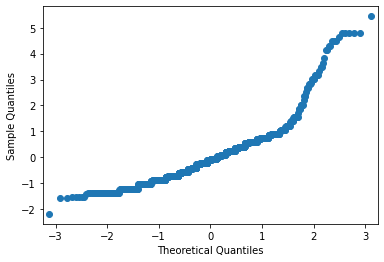

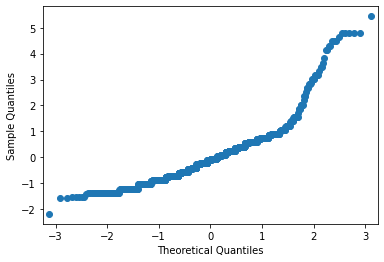

In [38]:
#testing for normality
smapi.qqplot(Fit_model.resid_pearson)
#this plot confirms what we have above, this is clearly non-normal

In [42]:
#Breusch-Pagan test for equal variance
stats.diagnostic.het_breuschpagan(Fit_model.resid_pearson, Fit_model.model.exog)
#since our p-values are less than 0.05, we reject the null and have a violation of the equal variance condition with significance level 0.05

(65.98430302272709,
 1.5961338439364685e-13,
 17.468983309707486,
 6.615579336290416e-14)

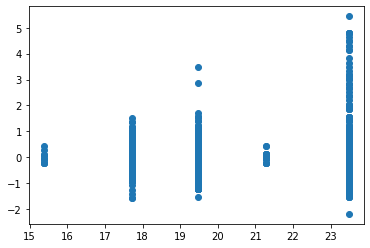

In [46]:
plt.scatter(Fit_model.fittedvalues, Fit_model.resid_pearson)
#we can verify the above results in the graphic below as well, it's clear the variances are not equal

**Summarize**

> *Report the test statistics, p-values, and your descisions about equal variance and normality.*

The Anderson Darling test gave us the test statistic of 22.06 and the p-value = 0.0. At our 0.05 significance level, we rejected the null hypothesis that the errors are non-normal, which will need to be remedied. The Breusch-Pagan test for equal error varaince gave us the lagrange multiplier of 65.98 and the corresponding p-value = 1.60e-13 so we reject the null and conclude that there is heteroscedasticity at the significance level 0.05.


## Part 5: Remediation & Testing

Based on your findings above, attempt remediation steps. If none are needed, explain why.

*Hint: Try to balance each category. Drop categories with few observations and resample to create equal groups.*

In [47]:
#Box-Cox transformation to fix (lack of) normality
from scipy import stats as bc
fuel_economy['City_BC'], _ = bc.boxcox(fuel_economy['City'] + .0001) #the 0.0001 addition helps it so that we don't encounter log(0) transformation errors

<ipython-input-47-d364263c527a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_economy['City_BC'], _ = bc.boxcox(fuel_economy['City'] + .0001) #the 0.0001 addition helps it so that we don't encounter log(0) transformation errors


<Axes: >

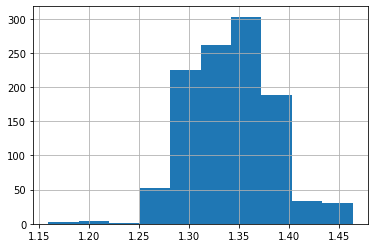

In [49]:
fuel_economy['City_BC'].hist()
#histogram of our transformed response

<Axes: >

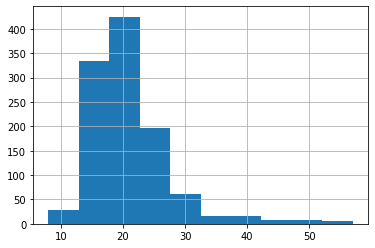

In [51]:
#initial response as a comparison
fuel_economy['City'].hist()
#it does appear more "normal" after the transformation

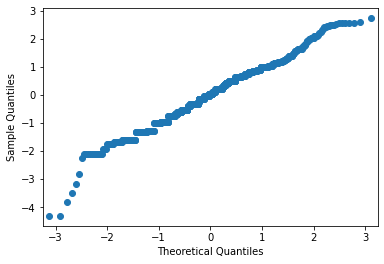

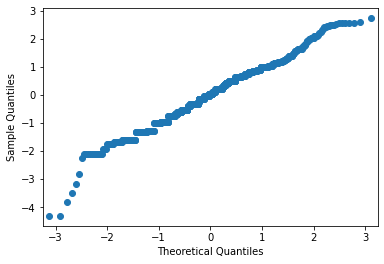

In [54]:
#now that we made the transformation, let's recheck the model
model1 = smf.ols(formula='City_BC ~ Q("Fuel Usage")', data=fuel_economy)
Fit_model1 = model1.fit()
smapi.qqplot(Fit_model1.resid_pearson)
#this definitely looks more normal than what we had before

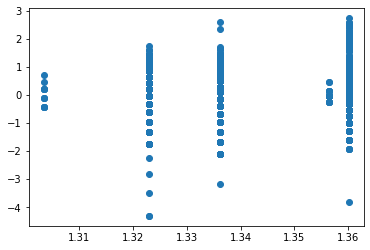

In [56]:
plt.scatter(Fit_model1.fittedvalues, Fit_model1.resid_pearson)
#the variances do appear a little improved from the prior model

In [64]:
#removing smaller categories
fuel_economy1 = fuel_economy[fuel_economy['Fuel Usage'] != 'GM']

In [67]:
fuel_economy1 = fuel_economy1[fuel_economy['Fuel Usage'] != 'DU']

<ipython-input-67-e3ced6c82e47>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fuel_economy1 = fuel_economy1[fuel_economy['Fuel Usage'] != 'DU']


<Axes: >

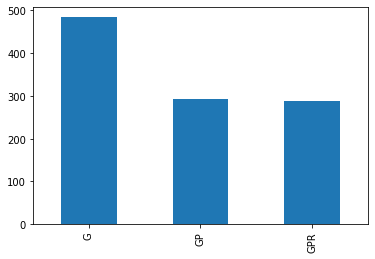

In [66]:
fuel_economy1['Fuel Usage'].value_counts().plot.bar()

In [68]:
#with the remediation done, 
model2 = smf.ols(formula='City_BC ~ Q("Fuel Usage")', data=fuel_economy1)
Fit_model2 = model2.fit()

In [69]:
#rechecking assumptions
#Anderson-Darling Normaltiy test
stats.diagnostic.normal_ad(Fit_model2.resid_pearson)

(3.4519963243456004, 1.239827299543527e-08)

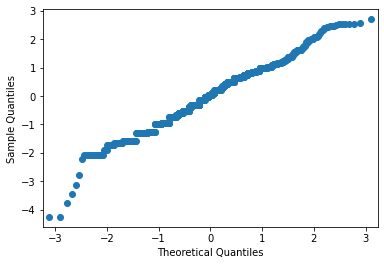

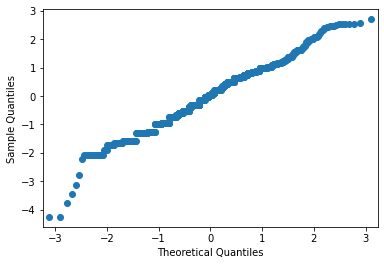

In [70]:
smapi.qqplot(Fit_model2.resid_pearson)

In [71]:
#Breusch-Pagan Homoscedasticity Test
stats.diagnostic.het_breuschpagan(Fit_model2.resid_pearson, Fit_model2.model.exog)

(5.373191689874053, 0.06811241037326501, 2.692612875539933, 0.0681660273925355)

In addition, use the Bonferroni correction method to test for outliers. Handle outliers as you see fit.

> *The Bonferroni Outlier Tests uses a t distribution to test whether the model's largest studentized residual value's outlier status is statistically different from the other observations in the model. A significant p-value indicates an extreme outlier that warrants further examination. – [Source](https://bookdown.org/wwwehde/qrm_textbook_updates/ols-assumptions-and-simple-regression-diagnostics.html#examining-outlier-data)*

```
model.outlier_test(method='bonf', alpha=0.5, cutoff=1)
```

**Reference:**

- [statsmodels.regression.linear_model.OLSResults.outlier_test](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html)

In [74]:
Fit_model2.outlier_test(method='bonf', alpha=0.5, cutoff=1)

,student_resid,unadj_p,bonf(p)
10,-3.476667,0.000528,0.562579
11,-4.291834,0.000019,0.020597
12,-4.291834,0.000019,0.020597
591,-3.778873,0.000166,0.177117


In [82]:
#removing the outlier lines
fuel_economy2 = fuel_economy1.drop(fuel_economy1.index[[10,11,12,591]])

In [83]:
#new model
model3 = smf.ols(formula='City_BC ~ Q("Fuel Usage")', data=fuel_economy2)
Fit_model3 = model3.fit()

In [84]:
#F table
smapi.stats.anova_lm(Fit_model3, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,890.455754,1.0,641316.598700,0.000000e+00
"Q(""Fuel Usage"")",0.251530,2.0,90.577527,5.009360e-37
Residual,1.463459,1054.0,NaN,NaN


In [85]:
#assumptions
stats.diagnostic.normal_ad(Fit_model3.resid_pearson)

(3.6009258748683806, 5.3987916748551245e-09)

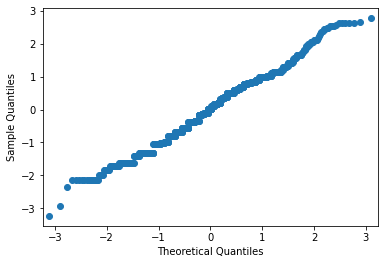

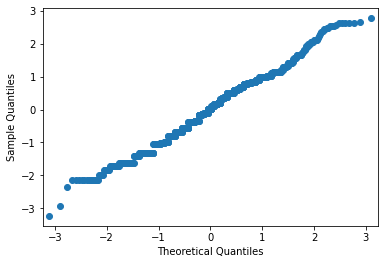

In [86]:
smapi.qqplot(Fit_model3.resid_pearson)

In [87]:
#assumptions
stats.diagnostic.het_breuschpagan(Fit_model3.resid_pearson, Fit_model3.model.exog)

(21.25504935866082,
 2.4239556834620988e-05,
 10.814835259470282,
 2.242437413511973e-05)

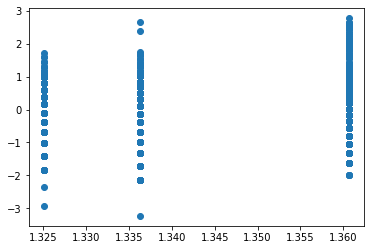

In [90]:
plt.scatter(Fit_model3.fittedvalues, Fit_model3.resid_pearson)
#this looks much more even than prior iterations!

Regardless of whether remediation was successful or necessary, perform a posthoc test for means using TukeyHSD.

```
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = pairwise_tukeyhsd(df['response'], df['predictor'])
print(res)
```

**Reference**:

- [How to Perform Tukey’s Test in Python](https://www.statology.org/tukey-test-python/)

In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

res = pairwise_tukeyhsd(fuel_economy2['City_BC'], fuel_economy2['Fuel Usage'])
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     G     GP  -0.0244   0.0 -0.0309 -0.0179   True
     G    GPR  -0.0355   0.0  -0.042  -0.029   True
    GP    GPR  -0.0111 0.001 -0.0184 -0.0038   True
---------------------------------------------------


Interpret your results and provide the significance of each factor.

From Tukey's HSD test, we have the mean differences and p-values for the 3 Fuel Usage groups we evaluated. We can see that for each comparison (G and GP, G and GPR, and GP and GPR), the respective p-values are less than our chose significance level of 0.05. That is, there is a statistically significant difference between the means of each Fuel Usage group.

## Part 6: Conclusions

> *Provide a summary statement and determine whether the differences between group means are statistically significant.*

Overall, our analysis included the examination of the fuel_economy data set, EDA for the City/ Hwy/ Combined/ Fuel Usage values, and the development of a linear model to evaluate the influence of the independent variable "Fuel Usage" on the dependent variable "City." Our initial model had issues with both error normality and varaince heteroscedasticity so we performed a box cox transformation and subset the data to abosolve sample size issues, as well as removing outliers. We finally reran the model on this cleaned dataframe. From both our F table for the full model and the Tukey Pairwise comparison table, we were able to determine with the 0.05 confidence level, that "Fuel Usage" is indeed a significant predictor for the response "City" and the treatment levels for the factor "Fuel Usage" are significantly different.